In [2]:
!pip3 install matplotlib numpy

Defaulting to user installation because normal site-packages is not writeable


In [3]:
CO2_FIX = { # micromol CO2/mg Chl/h
    'chlamy': { # chlamydomonas reinhardtii
        'high': 97,
        'low': 93,
        'very_low': 49
    },
    'chlorella': {
        'high': 447,
        'low': 447,
        'very_low': 447
    }
}

C_CHL = { # g Chl/L
    'nat': -1,
    'syn': 1.05
}

VOL = { # L
    'lab': 3,
    'dev': 50,
    'prod': 2000,
    'industrial': 10**5
}

Mm_CO2 = 44.009 # g/mol

def CO2_fix_kg_hr(strain: str = 'chlamy', fix: str = 'high', chl: str = 'syn', vol: str = 'industrial'):
    CO2_Fix_g_h = (CO2_FIX[strain][fix] / 10**6) * (C_CHL[chl] * 10**3) * VOL[vol] * Mm_CO2
    CO2_Fix_kg_h = CO2_Fix_g_h / 10**3
    return CO2_Fix_kg_h

def CO2_fix_kg_year(strain: str = 'chlamy', fix: str = 'high', chl: str = 'syn', vol: str = 'industrial',  h_per_day: int = 16, days_in_year: int = 300):

    CO2_fix_kg_per_hr = CO2_fix_kg_hr(strain=strain,fix=fix,chl=chl,vol=vol)

    CO2_Fix_kg_year = CO2_fix_kg_per_hr * h_per_day * days_in_year
    return CO2_Fix_kg_year

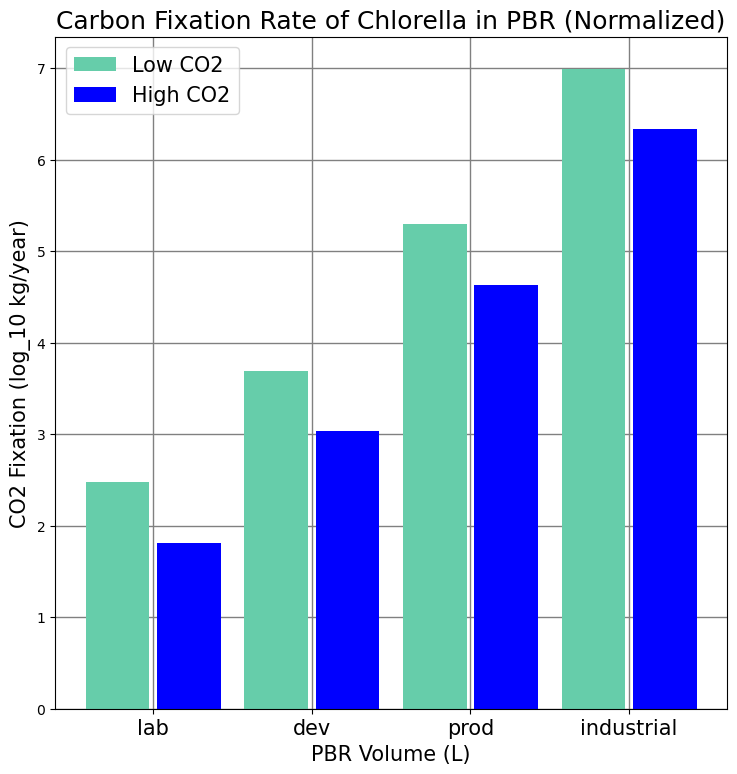

In [9]:
CO2_lab_hi, CO2_lab_lo = CO2_fix_kg_year(vol='lab'), CO2_fix_kg_year(strain='chlorella',vol='lab')
CO2_dev_hi, CO2_dev_lo = CO2_fix_kg_year(vol='dev'), CO2_fix_kg_year(strain='chlorella',vol='dev')
CO2_prod_hi, CO2_prod_lo = CO2_fix_kg_year(vol='prod'), CO2_fix_kg_year(strain='chlorella',vol='prod')
CO2_ind_hi, CO2_ind_lo = CO2_fix_kg_year(), CO2_fix_kg_year(strain='chlorella')

import matplotlib.pyplot as plt, numpy as np, math

logarithm = lambda x: math.log10(x)

lows = [CO2_lab_lo, CO2_dev_lo, CO2_prod_lo, CO2_ind_lo]
highs = [CO2_lab_hi, CO2_dev_hi, CO2_prod_hi, CO2_ind_hi]
lows_norm, highs_norm = list(map(logarithm, lows)), list(map(logarithm, highs))
labels = list(VOL.keys())

fig, ax = plt.figure(figsize=(8,8)), plt.gca()
fig.subplots_adjust(left=0.08, bottom=0.08, right=0.92, top=0.92, wspace=1, hspace=1)
bar1 = np.arange(len(labels))
bar2 = [i+0.45 for i in bar1]

plt.bar(bar1, lows_norm, 0.4,color='mediumaquamarine',label='Low CO2')
plt.bar(bar2, highs_norm, 0.4,color='blue',label='High CO2')
plt.title('Carbon Fixation Rate of Chlorella in PBR (Normalized)', fontsize=18)
plt.xlabel('PBR Volume (L)', fontsize=15)
plt.ylabel('CO2 Fixation (log_10 kg/year)', fontsize=15)
plt.xticks(np.add(bar1, bar2)/2,labels,fontsize=15)
plt.grid(color='grey',linewidth=1)
ax.set_axisbelow(True)
plt.legend(loc=2,prop={'size':15})
plt.show()

In [5]:
from math import ceil

# CHLAMY
print('Chlamydomonas reinhardtii CO2 Capture Stats\n')
# tonne CO2/year
prod_CO2_fix = CO2_fix_kg_year(fix='high',chl='syn',vol='industrial', h_per_day=24, days_in_year=365) / 10**3
# (Canada) National Carbon Emissions (tonnes C/year)
national_CO2_emissions  = (693.9 * 10**6)
# Number of the Sample PBRs that would match the emissions of Canada
n_pbr_equiv = ceil(national_CO2_emissions / prod_CO2_fix)
print(f'CO2 fix (tonne CO2/year): {prod_CO2_fix:.1f}')
print(f'Canada emissions (tonne CO2/year): {national_CO2_emissions:.1f}')
print(f'Ratio: {n_pbr_equiv}:1')
# CHLORELLA
print('\n\n\nChlorella vulgaris CO2 Capture Stats\n')
# tonne CO2/year
prod_CO2_fix = CO2_fix_kg_year(strain='chlorella',fix='high',chl='syn',vol='industrial', h_per_day=24, days_in_year=365) / 10**3
n_pbr_equiv = ceil(national_CO2_emissions / prod_CO2_fix)
print(f'CO2 fix (tonne CO2/year): {prod_CO2_fix:.1f}')
print(f'Canada emissions (tonne CO2/year): {national_CO2_emissions:.1f}')
print(f'Ratio: {n_pbr_equiv}:1')

Chlamydomonas reinhardtii CO2 Capture Stats

CO2 fix (tonne CO2/year): 3926.5
Canada emissions (tonne CO2/year): 693900000.0
Ratio: 176722:1



Chlorella vulgaris CO2 Capture Stats

CO2 fix (tonne CO2/year): 18094.3
Canada emissions (tonne CO2/year): 693900000.0
Ratio: 38350:1


In [6]:
CO2_fix_prod_hr, CO2_fix_prod_year = CO2_fix_kg_hr() / 10**3, CO2_fix_kg_year() / 10**3
print('Chlamy reinhardtii')
print(f'Industrial Scale (100,000L) CO2 fixation rate (tonne/hr): {CO2_fix_prod_hr:.2f}')
print(f'Industrial Scale (100,000L) CO2 fixation rate (tonne/year): {CO2_fix_prod_year:.2f}')
CO2_fix_prod_hr, CO2_fix_prod_year = CO2_fix_kg_hr(strain='chlorella') / 10**3, CO2_fix_kg_year(strain='chlorella') / 10**3
print('Chlorella vulgaris')
print(f'Industrial Scale (100,000L) CO2 fixation rate (tonne/hr): {CO2_fix_prod_hr:.2f}')
print(f'Industrial Scale (100,000L) CO2 fixation rate (tonne/year): {CO2_fix_prod_year:.2f}')

Chlamy reinhardtii
Industrial Scale (100,000L) CO2 fixation rate (tonne/hr): 0.45
Industrial Scale (100,000L) CO2 fixation rate (tonne/year): 2151.51
Chlorella vulgaris
Industrial Scale (100,000L) CO2 fixation rate (tonne/hr): 2.07
Industrial Scale (100,000L) CO2 fixation rate (tonne/year): 9914.70
